# Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split







#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def load_csv(path: str) -> pd.DataFrame:
    return pd.read_csv(path).iloc[:,1:]


In [3]:
path="converted_data.csv"
df=load_csv(path)

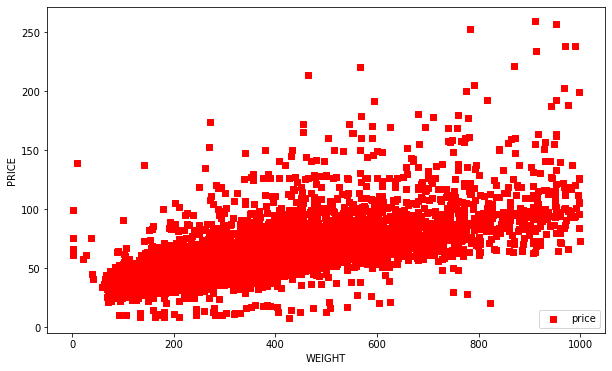

In [6]:
plt.scatter(x=df['weight'],y=df['price-ILS'],c='r',marker='s',label='price')


plt.legend(numpoints=1,loc=4)

plt.ylabel('PRICE')
plt.xlabel('WEIGHT')
plt.show()

In [7]:
m=linear_model.LinearRegression().fit(df.iloc[:,11:12],df.iloc[:,7:8])
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[0.08140933]]
b0: [31.71508186]


In [8]:
# the intercept of the line is b_0=31.715 this means that for the minimal weight 
# for the book the price will be 31 shekels


#the slope of the line is b_1=0.081 this means that for each gram the price increase by 8%


In [10]:
from sklearn.metrics import r2_score

r2_score(df['price-ILS'].tolist(),m.predict(df.iloc[:,11:12]).flatten())
#the r squared is almost 0.5 

0.4623814845847677

In [11]:
res=m.coef_*96+m.intercept_
res

array([[39.53037784]])

In [12]:
#example from the dataset
df[(df['weight']>95 )& (df['weight']<99)]['price-ILS'].mean()
#we can see that the differnce bewtween the predtion to the actual price is very small.

38.25066666666667

# Multiple Linear Regression

In [23]:
def prepare_X_y(df,target):
    #moving the target to the end of the dataframe
    columns_list=list(df.columns)
    columns_list.remove(target)
    columns_list.append(target)
    df_for_regression=df[columns_list]
    
    #removing unnecessary columns 
    df_for_regression=df_for_regression.drop(['title'],axis=1)
    X=df_for_regression.iloc[:,:-1]
    y=df_for_regression.iloc[:,-1]
    return X,y,df_for_regression

In [38]:
def print_coefficient(df_reg: pd):
    for k,v in sorted(dict(zip(df_reg.columns,(reg.coef_))).items(), key=lambda x:x[1],reverse=True):
        print(k,v)

In [39]:
X,y,df_for_regression=prepare_X_y(df,'pages-count')
#spliting the data 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)


In [40]:
reg=LinearRegression(fit_intercept=False)
reg.fit(Xtrain,Ytrain)
y_pred=reg.predict(Xtest)

In [41]:
print(f"r^2: {metrics.r2_score(Ytest,y_pred)}")

r^2: 0.6769626486043068


In [42]:
print_coefficient(df_for_regression)

Historical Fiction 60.89145659946152
Romance Books for Teenagers 41.804624768084814
Fantasy 30.917922544134008
Fantasy Books 30.91792254413309
Memoirs 23.4782981036572
Adventure Books 20.702307090782654
Adult & Contemporary Romance 20.08427990560717
Adventure Books for Kids 17.58557736040975
Thriller Books 17.57267490814682
Thrillers 17.572674908145412
Management: Leadership & Motivation 13.807028315313396
Science Fiction 12.585035386960858
Family Issues 12.523137696274183
Classic Books & Novels 11.664788767507034
Business & Management 11.192309458439588
Romance 10.485718383925125
Romance Books 10.485718383924473
Contemporary Fiction 10.280286627062804
Popular Psychology 9.943155757966863
Psychology 8.838292568876787
Fantasy Books for Kids 7.4355266124153445
rating 7.393205342846249
Sci Fi Books for Kids 7.156642448559323
Characters 7.1563878475828275
Crime Fiction 5.696797627785338
Crime 5.696797627783244
Traditional 3.872259004888946
Children's General Story Books 3.7887275029245444


from the coefficients list above we can infer that there is a positive relation between "Historical
Fiction" books and number of pages
from the other side we can see that price has negligible relation,
we can see all this clearly from the graph below-->

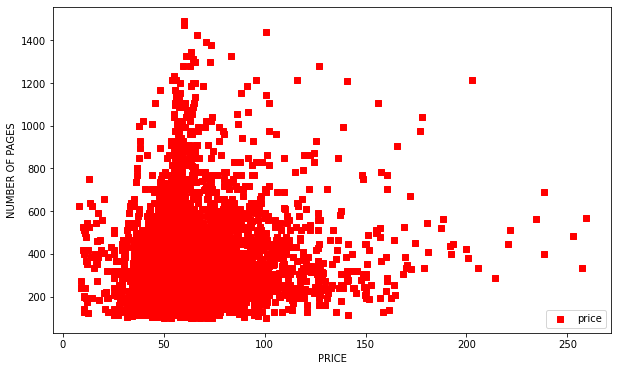

In [62]:
plt.scatter(x=df['price-ILS'],y=df['pages-count'],c='r',marker='s',label='price')


plt.legend(numpoints=1,loc=4)

plt.ylabel('NUMBER OF PAGES')
plt.xlabel('PRICE')
plt.show()

# Now let's predict the price of the books!

In [58]:
X,y,df_for_regression=prepare_X_y(df,'price-ILS')
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2)

In [59]:
reg=LinearRegression(fit_intercept=False)
reg.fit(Xtrain,Ytrain)
y_pred=reg.predict(Xtest)
print(f"r^2: {metrics.r2_score(Ytest,y_pred)}")

r^2: 0.5678391417712376


In [60]:
print_coefficient(df_for_regression)

back-type 6.557587200100021
Psychology 6.457015230785183
Storybooks 4.841507681274781
rating 4.707051667258279
Business & Management 4.531130159119296
Management: Leadership & Motivation 3.4534740981520624
Graphic Novels: Manga 2.803476293573505
Mind, Body, Spirit: Thought & Practice 2.3282923847499593
Advice On Parenting 1.5240153049953848
Family & Relationships 0.8125524879478812
Memoirs 0.8065790992476198
Popular Medicine & Health 0.7697862994868647
Family Issues 0.48176640681879146
season-published 0.32531264549961103
Adventure Books 0.2656988069183246
height 0.13119295224865435
Personal Development 0.12728911761172812
weight 0.06776253380398423
thickness 0.014256096294962495
width 0.005729177692140097
author 0.0009267953350548148
bestsellers-rank 1.2757810757294376e-05
rating-count 1.3287510928876312e-06
year-published -0.007273590025530907
pages-count -0.00915810612916925
Advice On Careers & Achieving Success -0.10877090225053143
Thrillers -0.3909326964374862
Thriller Books -0.39

We already know that most of the books rating distribute between 3.5 - 4.5, so we consider only those books:

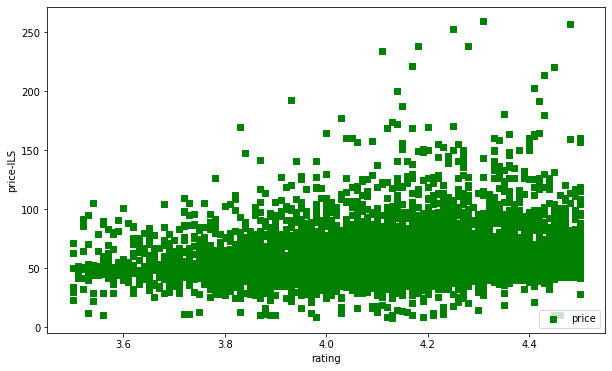

In [81]:
plot_df = df[(df['rating'] >= 3.5) & (df['rating'] <= 4.5)]
plt.scatter(x=plot_df['rating'],y=plot_df['price-ILS'],c='g',marker='s',label='price')


plt.legend(numpoints=1,loc=4)

plt.ylabel('price-ILS')
plt.xlabel('rating')
plt.show()